In [1]:
import math
from sklearn import neighbors
import os
import os.path
import pickle
from PIL import Image, ImageDraw
# import face_recognitiongnition_cli import image_files_in_folder
import matplotlib.pyplot as plt
from models import FaceNetModel
from models import model_921
from detection import mtcnn_detect
from facenet_pytorch import MTCNN
import torch
from recog_function import first_use, second_use, creat_df

ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(
    image_size=224, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

# model = model_921()
model = FaceNetModel().to(device)
state = torch.load('./last_checkpoint.pth')
model.load_state_dict(state["state_dict"])

# df = creat_df('FR_df')
df = pd.read_csv('FR_df_3-10-381.csv')

# input_dir = "./family/"
# input_dir = "/home/jupyter/data/family/3-10-381//"
name_dic = {}  # extra 이름(unknown_{})과 개수

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [11]:
import pandas as pd

df = pd.read_csv('FR_df_3-10-381.csv')
input_dir = "/home/jupyter/data/family/3-1-304/"

In [12]:
if len(df)==0:
    df = first_use(input_dir,model, device,mtcnn, name_dic, df)
else :
    df = second_use(input_dir,model, device,mtcnn, name_dic, df)

Looking for faces in 3-1-0032.jpg
- Found dad
Training KNN classifier...
Training complete!
- Found unknown_3
Training KNN classifier...
Training complete!
- Found mom
Training KNN classifier...
Training complete!
0
Looking for faces in 3-1-0155.jpg
1
Looking for faces in 3-1-0069.jpg
- Found dad
Training KNN classifier...
Training complete!
2
Looking for faces in 3-1-0218.jpg
- Found dad
Training KNN classifier...
Training complete!
- Found mom
Training KNN classifier...
Training complete!
- Found mom
Training KNN classifier...
Training complete!
- Found unknown_3
Training KNN classifier...
Training complete!
3
Looking for faces in 3-1-0065.jpg
4
Looking for faces in 3-1-0046.jpg
5
Looking for faces in 3-1-0188.jpg
- Found unknown_5
Training KNN classifier...
Training complete!
6
Looking for faces in 3-1-0019.jpg
7
Looking for faces in 3-1-0303.jpg
- Found unknown_14
Training KNN classifier...
Training complete!
- Found unknown_7
Training KNN classifier...
Training complete!
8
Looking

KeyboardInterrupt: 

In [5]:
df

,photo_ID,x_left,y_left,x_right,y_right,class
0,represent,923.578064,555.244812,1100.830078,800.024475,dad
1,represent,1552.755981,603.423584,1722.103638,833.040894,mom
2,represent,1126.510376,778.310059,1277.747925,979.747925,brother
3,represent,1418.496460,644.067688,1565.079956,829.920166,me
4,3-10-0037,1840.529663,833.502014,1958.351929,986.390625,dad
...,...,...,...,...,...,...
755,3-10-0281,1722.880371,967.458313,1831.286011,1096.060059,mom
756,3-10-0281,2007.906494,692.894348,2115.961426,809.675781,mom
757,3-10-0281,1552.378174,978.747742,1657.131592,1095.626221,dad
758,3-10-0380,1381.221313,701.432068,1580.509399,944.768616,unknown_6


In [8]:
new_df = df.loc[4:]

In [9]:
# new_df = pd.DataFrame({'class':[]})
# for i in range(len(df)):
#     if 'unknown' in df['class']:
#         continue
#     else :
#         new_df.append(df['class'].loc[i])
# df['photoID'].loc[0]='3-4-0192'
new_df.to_csv('FR_df_3-10-381.csv',index=False)

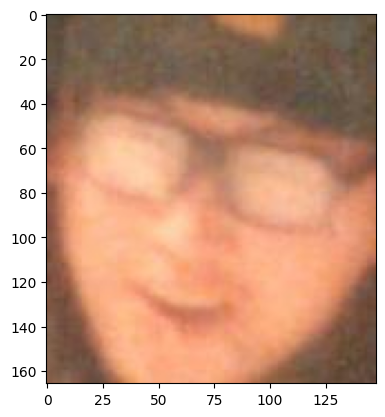

In [4]:
path = '/home/jupyter/data/family-reference/'
for i in os.listdir(path):
    print(i)
    image = Image.open(path+i)
    plt.imshow(image)
    plt.show()